In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r'01JBH83KFF39VMHFD1YC8QR694.xlsx')

df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender
0,CMP1,Loyalty Rewards Week,Paid Ads,2022-10-06,2024-04-14,35861.8,5335.2,3502.2,3764.566,14429.298,Turda,25-34,Male
1,CMP2,Free Shipping Frenzy,Paid Ads,2022-11-23,2024-05-12,53380.6,5374.2,5142.8,11560.458,28115.802,Turda,25-34,Male
2,CMP3,Limited Edition Launch,Influencer Marketing,2022-09-30,2024-04-07,20716.8,12178.4,11918.4,5457.478,7950.176,Călărași,45-54,Female
3,CMP4,Flashback Deals,Influencer Marketing,2022-10-26,2024-04-26,65319.8,34369.4,4927.0,7193.836,26891.384,Călărași,18-24,Male
4,CMP5,Loyalty Rewards Week,Influencer Marketing,2023-05-09,2024-11-04,6549.4,4560.4,4154.8,3789.136,5749.614,Călărași,45-54,Male


In [4]:
df.columns

Index(['Campaign_ID', 'Campaign_Name', 'Marketing_Channel', 'Start_Date',
       'End_Date', 'Impressions', 'Clicks', 'Conversions', 'Total_Spend',
       'Revenue_Generated', 'Location', 'Age_Group', 'Gender'],
      dtype='object')

In [5]:
df['Conversion_Rate'] = (df['Conversions'] / df['Clicks'])*100

df['CPC'] = df['Total_Spend'] / df['Clicks']

df['CPA']  = df['Total_Spend'] / df['Conversions']

df['ROAS'] = df['Revenue_Generated'] / df['Total_Spend']

df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,Conversion_Rate,CPC,CPA,ROAS
0,CMP1,Loyalty Rewards Week,Paid Ads,2022-10-06,2024-04-14,35861.8,5335.2,3502.2,3764.566,14429.298,Turda,25-34,Male,65.643275,0.705609,1.074915,3.832925
1,CMP2,Free Shipping Frenzy,Paid Ads,2022-11-23,2024-05-12,53380.6,5374.2,5142.8,11560.458,28115.802,Turda,25-34,Male,95.694243,2.151103,2.247892,2.432066
2,CMP3,Limited Edition Launch,Influencer Marketing,2022-09-30,2024-04-07,20716.8,12178.4,11918.4,5457.478,7950.176,Călărași,45-54,Female,97.865073,0.448128,0.457904,1.456749
3,CMP4,Flashback Deals,Influencer Marketing,2022-10-26,2024-04-26,65319.8,34369.4,4927.0,7193.836,26891.384,Călărași,18-24,Male,14.335426,0.209309,1.460084,3.738115
4,CMP5,Loyalty Rewards Week,Influencer Marketing,2023-05-09,2024-11-04,6549.4,4560.4,4154.8,3789.136,5749.614,Călărași,45-54,Male,91.106043,0.830878,0.911990,1.517394


In [6]:
channel_metrics = df.groupby('Marketing_Channel').agg({
    'Clicks':'sum',
    'Impressions':'sum',
    'Conversions':'sum',
    'Total_Spend':'sum',
    'Revenue_Generated':'sum',
})

channel_metrics['CTR'] = channel_metrics['Clicks'] / channel_metrics['Impressions']

channel_metrics['Conversion_Rate'] = (channel_metrics['Conversions'] / channel_metrics['Clicks'])*100

channel_metrics['CPC'] = channel_metrics['Total_Spend'] / channel_metrics['Clicks']

channel_metrics['CPA']  = channel_metrics['Total_Spend'] / channel_metrics['Conversions']

channel_metrics['ROAS'] = channel_metrics['Revenue_Generated'] / channel_metrics['Total_Spend']

channel_metrics.head()

,Clicks,Impressions,Conversions,Total_Spend,Revenue_Generated,CTR,Conversion_Rate,CPC,CPA,ROAS
Marketing_Channel,,,,,,,,,,
Email,16275859.6,31567010.8,8299954.0,3286164.934,8587312.214,0.515597,50.995488,0.201904,0.395926,2.613171
Influencer Marketing,15339142.0,31490609.8,7419505.6,3316556.256,8683194.234,0.487102,48.369756,0.216215,0.447005,2.618136
Paid Ads,16684761.6,33933614.0,8464916.2,3356140.996,8608269.306,0.491688,50.734415,0.201150,0.396477,2.564931
Social Media,17157410.4,33320983.8,8731060.0,3296584.980,8606550.186,0.514913,50.887982,0.192138,0.377570,2.610747


In [7]:
demographic_metrics = df.groupby(['Location','Age_Group','Gender']).agg({
    'Clicks':'sum',
    'Impressions':'sum',
    'Conversions':'sum',
    'Total_Spend':'sum',
    'Revenue_Generated':'sum',
})


demographic_metrics['CTR'] = demographic_metrics['Clicks'] / demographic_metrics['Impressions']

demographic_metrics['Conversion_Rate'] = (demographic_metrics['Conversions'] / demographic_metrics['Clicks'])*100

demographic_metrics['CPC'] = demographic_metrics['Total_Spend'] / demographic_metrics['Clicks']

demographic_metrics['CPA']  = demographic_metrics['Total_Spend'] / demographic_metrics['Conversions']

demographic_metrics['ROAS'] = demographic_metrics['Revenue_Generated'] / demographic_metrics['Total_Spend']

demographic_metrics.head()

Clicks  Impressions  Conversions  Total_Spend  \
Location Age_Group Gender                                                     
Călărași 18-24     Female  1466475.4    2973378.2     783208.4   302926.728   
                   Male    1825891.6    3447285.4     981692.4   348471.136   
         25-34     Female  1332739.2    3038583.6     706708.6   261699.958   
                   Male    1110803.2    2020337.8     589113.2   206129.300   
         35-44     Female  1605133.4    3348644.0     762023.6   380040.024   

                           Revenue_Generated       CTR  Conversion_Rate  \
Location Age_Group Gender                                                 
Călărași 18-24     Female         783811.808  0.493202        53.407538   
                   Male           895397.646  0.529661        53.765098   
         25-34     Female         717413.632  0.438605        53.026774   
                   Male           559308.308  0.549811        53.034885   
         35-44     Female        1026133.420  0.479338        47.474160   

                                CPC       CPA      ROAS  
Location Age_Group Gender                                
Călărași 18-24     Female  0.206568  0.386777  2.587463  
                   Male    0.190850  0.354970  2.569503  
         25-34     Female  0.196362  0.370308  2.741359  
                   Male    0.185568  0.349898  2.713386  
         35-44     Female  0.236765  0.498725  2.700067

In [8]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

df['Month'] = df['Start_Date'].dt.to_period('M')

monthly_metrics = df.groupby('Month').agg({
    'Clicks':'sum',
    'Impressions':'sum',
    'Conversions':'sum',
    'Total_Spend':'sum',
    'Revenue_Generated':'sum',
})

monthly_metrics['CTR'] = monthly_metrics['Clicks'] / monthly_metrics['Impressions']

monthly_metrics['Conversion_Rate'] = (monthly_metrics['Conversions'] / monthly_metrics['Clicks'])*100

monthly_metrics['CPC'] = monthly_metrics['Total_Spend'] / monthly_metrics['Clicks']

monthly_metrics['CPA']  = monthly_metrics['Total_Spend'] / monthly_metrics['Conversions']

monthly_metrics['ROAS'] = monthly_metrics['Revenue_Generated'] / monthly_metrics['Total_Spend']

monthly_metrics.head()

,Clicks,Impressions,Conversions,Total_Spend,Revenue_Generated,CTR,Conversion_Rate,CPC,CPA,ROAS
Month,,,,,,,,,,
2022-07,4498564.2,8968822.2,2422830.8,889548.010,2163254.834,0.501578,53.857869,0.197740,0.367152,2.431858
2022-08,6266634.4,12257505.0,3259014.2,1228777.134,3203780.320,0.511249,52.005814,0.196082,0.377040,2.607292
2022-09,6575301.2,13171314.0,3024803.6,1375964.564,3617646.006,0.499214,46.002510,0.209263,0.454894,2.629171
2022-10,7349264.0,14047488.0,4098400.8,1322655.516,3509414.870,0.523173,55.766139,0.179971,0.322725,2.653310
2022-11,6259448.0,11886581.2,3075787.0,1289516.696,3404307.166,0.526598,49.138311,0.206011,0.419248,2.639987


In [9]:
kpi_summary = {
    'Total Impressions': df['Impressions'].sum(),
    'Total Clicks': df['Clicks'].sum(),
    'Total Conversions': df['Conversions'].sum(),
    'Total Spend': round(df['Total_Spend'].sum(), 1), 
    'Total Revenue': df['Revenue_Generated'].sum(),
    'Average CTR': (df['Clicks'].sum() / df['Impressions'].sum()) * 100,
    'Average ROAS': df['Revenue_Generated'].sum() / df['Total_Spend'].sum()
}

#convert kpi_summary to dataframe
kpi_summary = pd.DataFrame(kpi_summary, index=[0])

kpi_summary

,Total Impressions,Total Clicks,Total Conversions,Total Spend,Total Revenue,Average CTR,Average ROAS
0,130312218.4,65457173.6,32915435.8,13255447.2,34485325.94,50.231033,2.601597


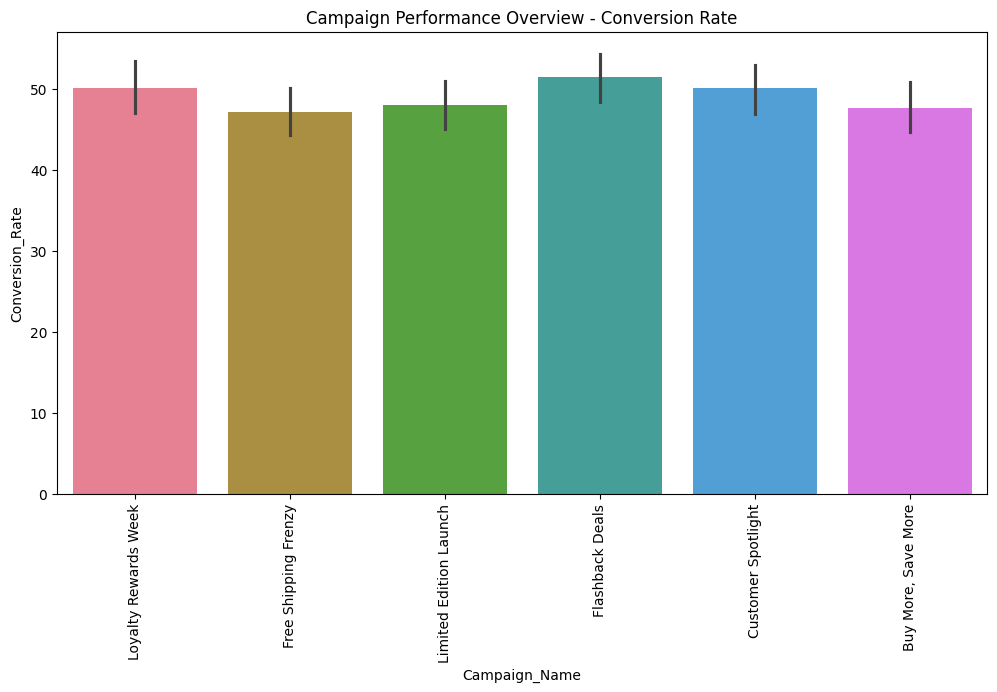

In [10]:
custom_palette = sns.color_palette("husl", len(df['Campaign_Name'].unique()))

plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Name', y='Conversion_Rate', data=df,palette=custom_palette)
plt.title('Campaign Performance Overview - Conversion Rate')
plt.xticks(rotation=90)
plt.show()

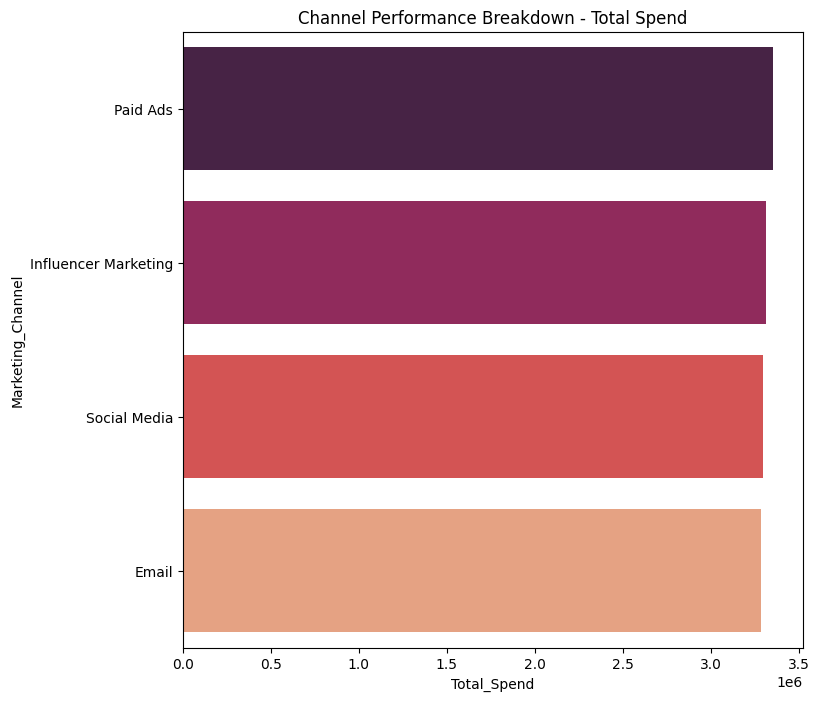

In [11]:
plt.figure(figsize=(8, 8))
channel_performance_sorted = channel_metrics.sort_values(by='Total_Spend', ascending=False)
sns.barplot(x='Total_Spend', y='Marketing_Channel', data=channel_performance_sorted,palette='rocket')
plt.title('Channel Performance Breakdown - Total Spend')
plt.show()

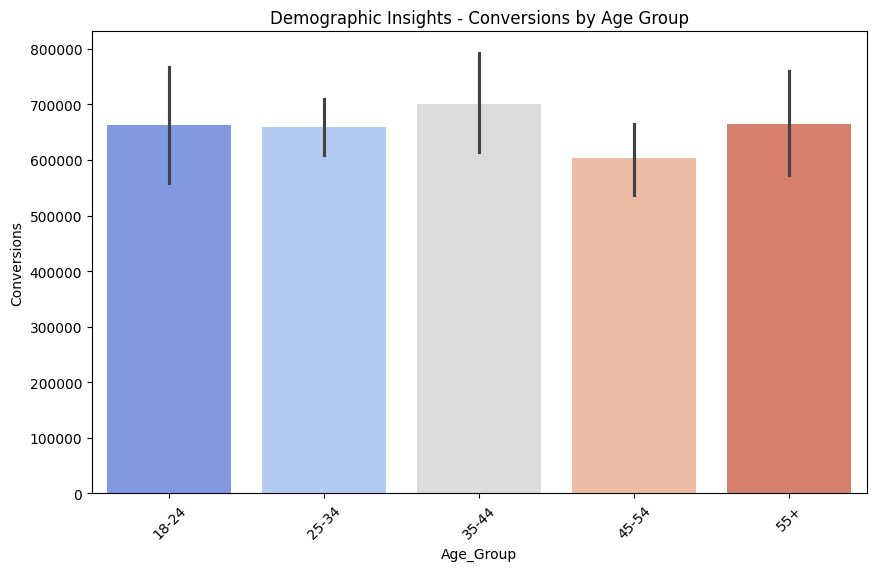

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Conversions', data=demographic_metrics,palette='coolwarm')
plt.title('Demographic Insights - Conversions by Age Group')
plt.xticks(rotation=45)
plt.show()

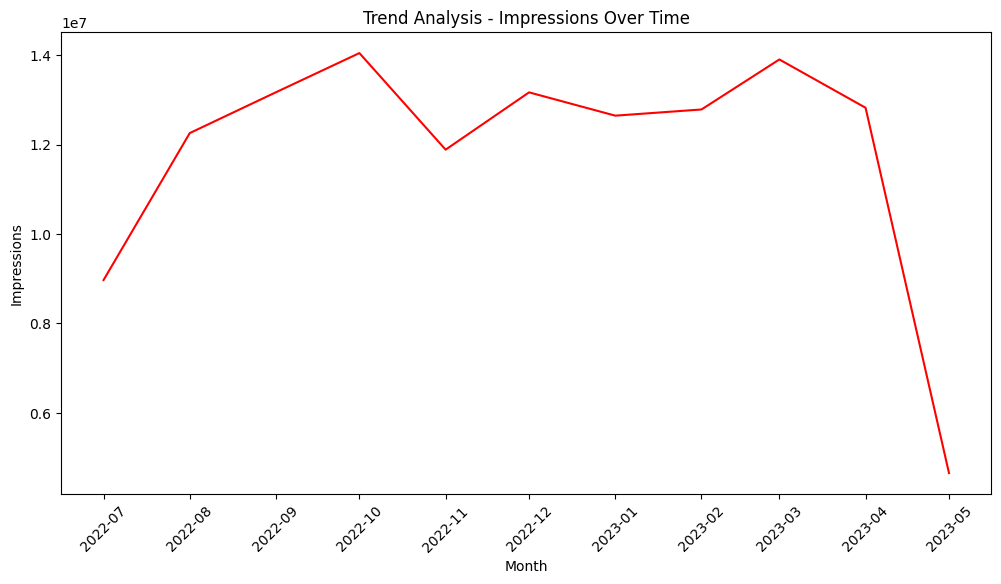

In [14]:
monthly_metrics = monthly_metrics.reset_index()
monthly_metrics['Month'] = monthly_metrics['Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Impressions', data=monthly_metrics,color='r')
plt.title('Trend Analysis - Impressions Over Time')
plt.xticks(rotation=45)
plt.show()


NameError: name 'p' is not defined

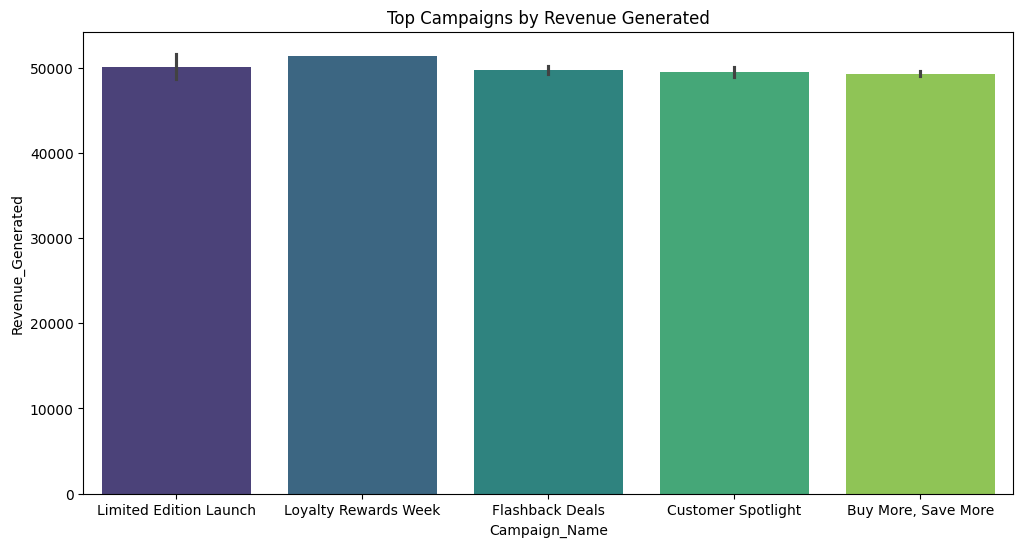

In [17]:
# Sort data by Revenue Generated and select the top 10 campaigns
top_revenue_campaigns = df.sort_values(by='Revenue_Generated', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Name', y='Revenue_Generated', data=top_revenue_campaigns, palette='viridis')
plt.title('Top Campaigns by Revenue Generated')
p


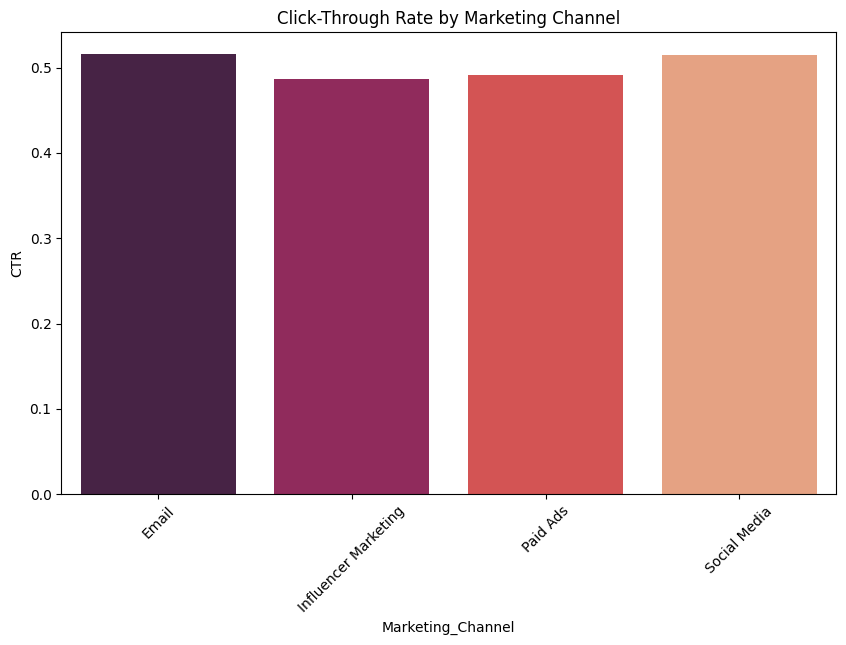

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_Channel', y='CTR', data=channel_metrics, palette='rocket')
plt.title('Click-Through Rate by Marketing Channel')
plt.xticks(rotation=45)
plt.show()


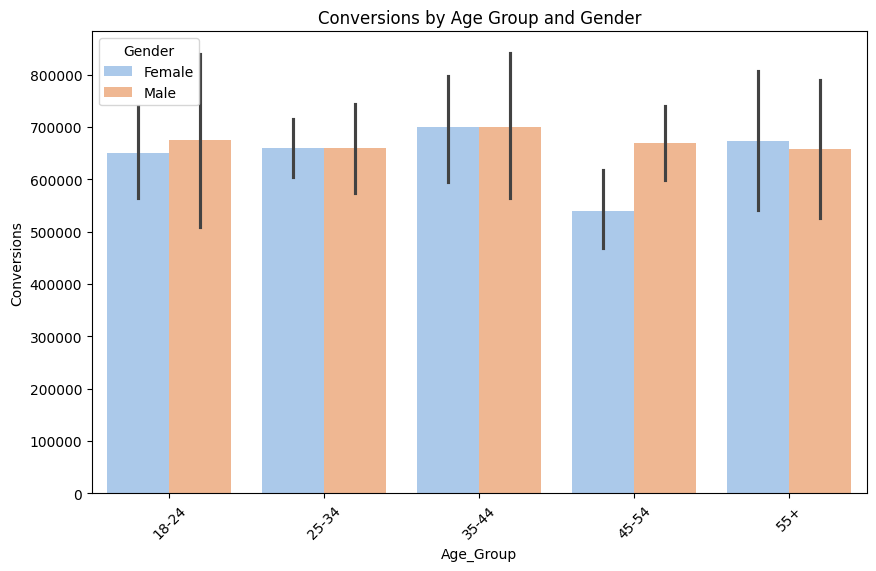

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Conversions', hue='Gender', data=demographic_metrics, palette='pastel')
plt.title('Conversions by Age Group and Gender')
plt.xticks(rotation=45)
plt.show()


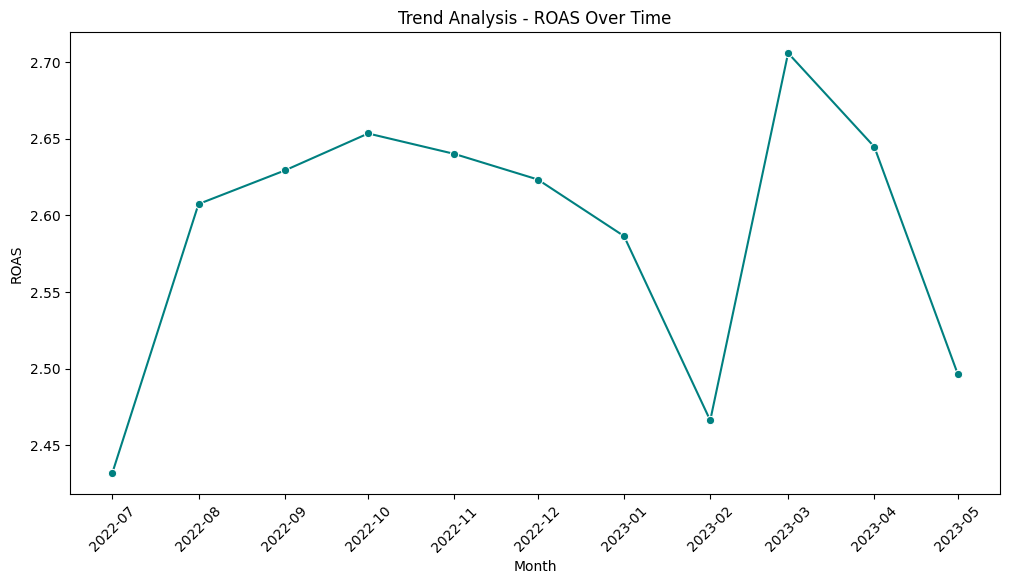

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='ROAS', data=monthly_metrics, marker='o', color='teal')
plt.title('Trend Analysis - ROAS Over Time')
plt.xticks(rotation=45)
plt.show()


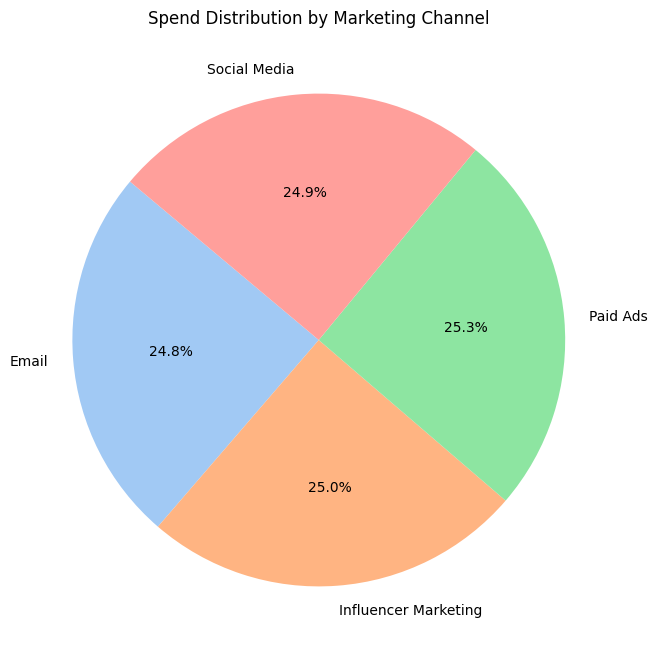

In [26]:
# Calculate total spend by channel
channel_spend = df.groupby('Marketing_Channel')['Total_Spend'].sum()

plt.figure(figsize=(8, 8))
plt.pie(channel_spend, labels=channel_spend.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Spend Distribution by Marketing Channel')
plt.show()


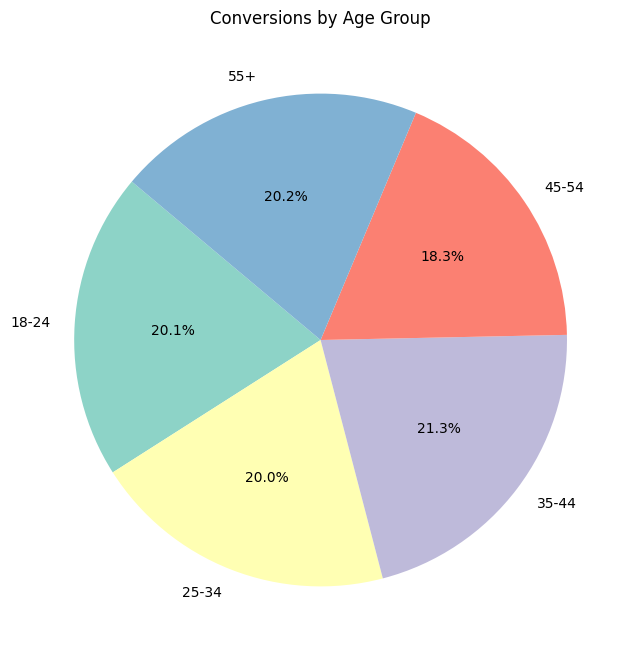

In [27]:
# Calculate total conversions by age group
age_group_conversions = df.groupby('Age_Group')['Conversions'].sum()

plt.figure(figsize=(8, 8))
plt.pie(age_group_conversions, labels=age_group_conversions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Conversions by Age Group')
plt.show()


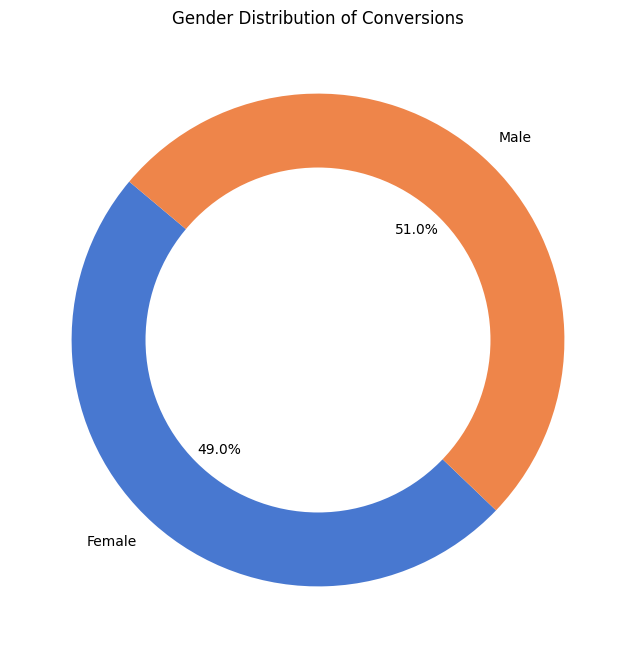

In [28]:
# Calculate total conversions by gender
gender_conversions = df.groupby('Gender')['Conversions'].sum()

plt.figure(figsize=(8, 8))
plt.pie(gender_conversions, labels=gender_conversions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
# Adding a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Gender Distribution of Conversions')
plt.show()
